Problem Statement:


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

Project Goal :  

provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# IMPORT LIBRARIES 

In [1]:
import pandas as pd     #To worked on dataframe
import numpy as np      #To do some basic
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder  #For encoding label to proceed for Regression
from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

Here, we are going to load our dataset and check some basics like it's shape, column name, null value presence, statatics

In [2]:
df = pd.read_csv('hr.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape #There are 1470 raws and 35 columns in dataframe

(1470, 35)

In [5]:
df.isnull().sum()

# yeh, there is no null values in our dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

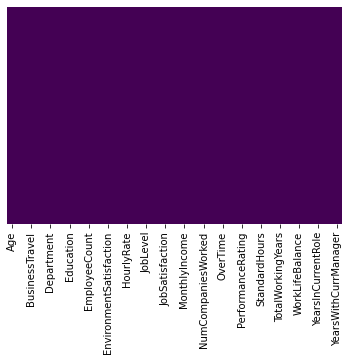

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # to check null values by graph and as we visulise blank graph means there is no null values

In [7]:
print(df.dtypes.value_counts())

print(df.dtypes) 

#check data types of all columns and we can see that 9 object columns and others are int64

int64     26
object     9
dtype: int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel

In [8]:
df.nunique()

#as per below table, we can see number of unique value in all columns

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'], inplace = True, axis = 1)

#by common view, we know that emplyeecount and emplyee number have no any relation with attrition and standardhours are also not effect on attrition. Over18 can effect on attrition but it is not more enough to consider 

In [10]:
df['Attrition'].value_counts()

#our target variable have 1233 no and 237 yes values

No     1233
Yes     237
Name: Attrition, dtype: int64

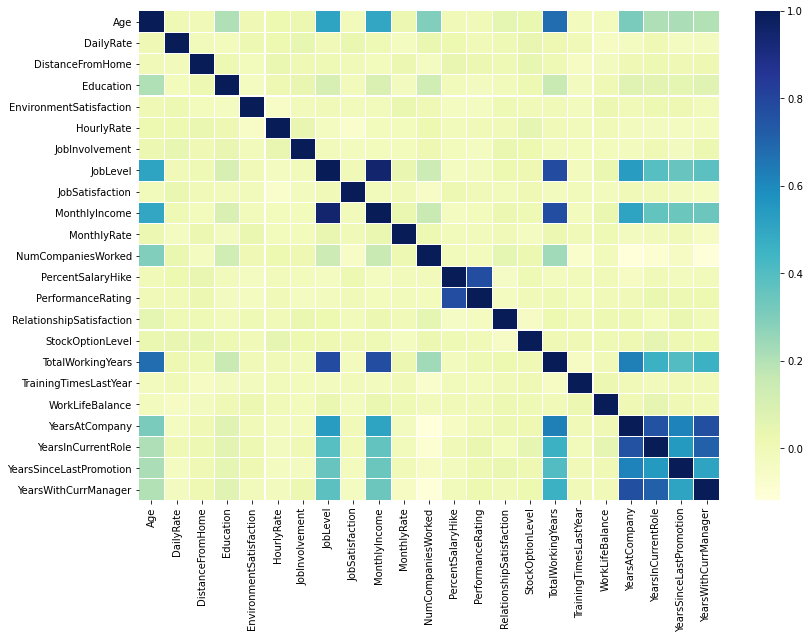

In [11]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()


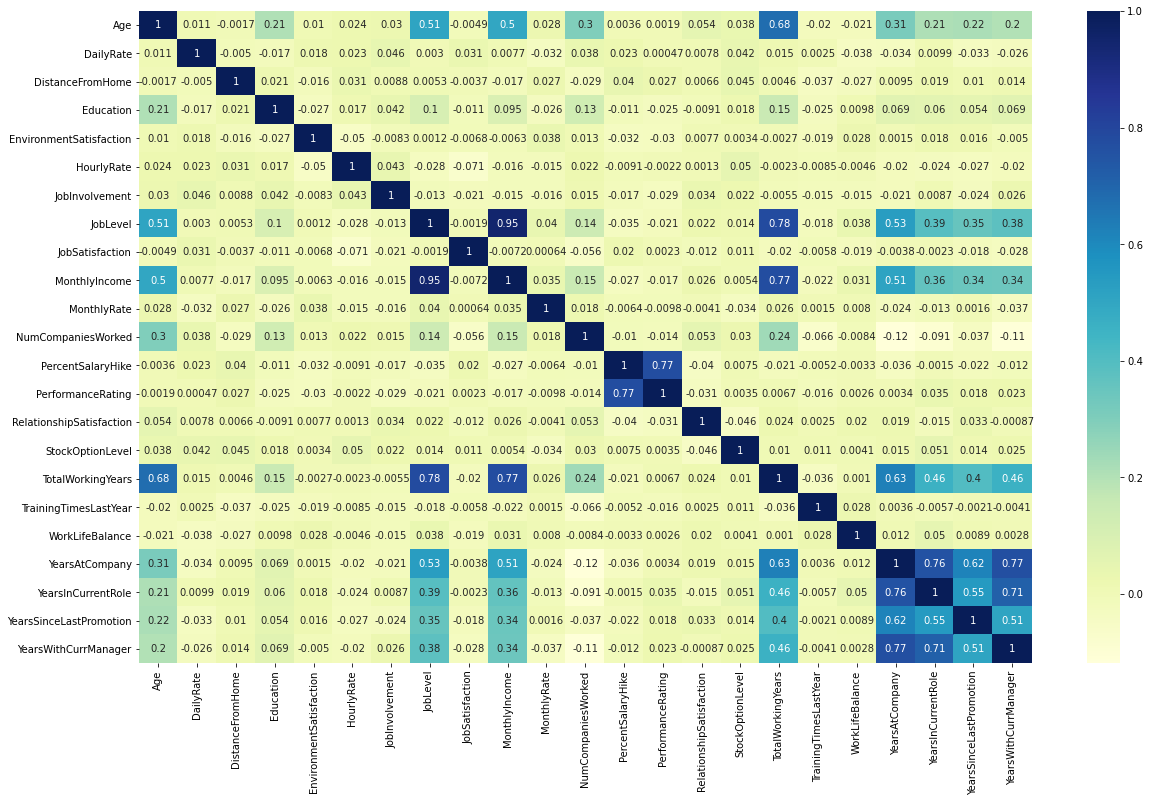

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')



Blue color contain box have high co-relation relatively and we can visulise that

1)job level have 95% relation with monthly income

2)job level have 78% relation with Total working years

3) Monthly income have good relation with Total workingyears

4) business travel, dailyrate, educationfield,stockoptonlevel like column have not relation with any column

In [13]:
df.drop(['BusinessTravel','DailyRate','EducationField','EnvironmentSatisfaction','StockOptionLevel','WorkLifeBalance','TrainingTimesLastYear','NumCompaniesWorked'], inplace = True, axis = 1)

Drop below columns becasue there is no relationship between this column and other columns 

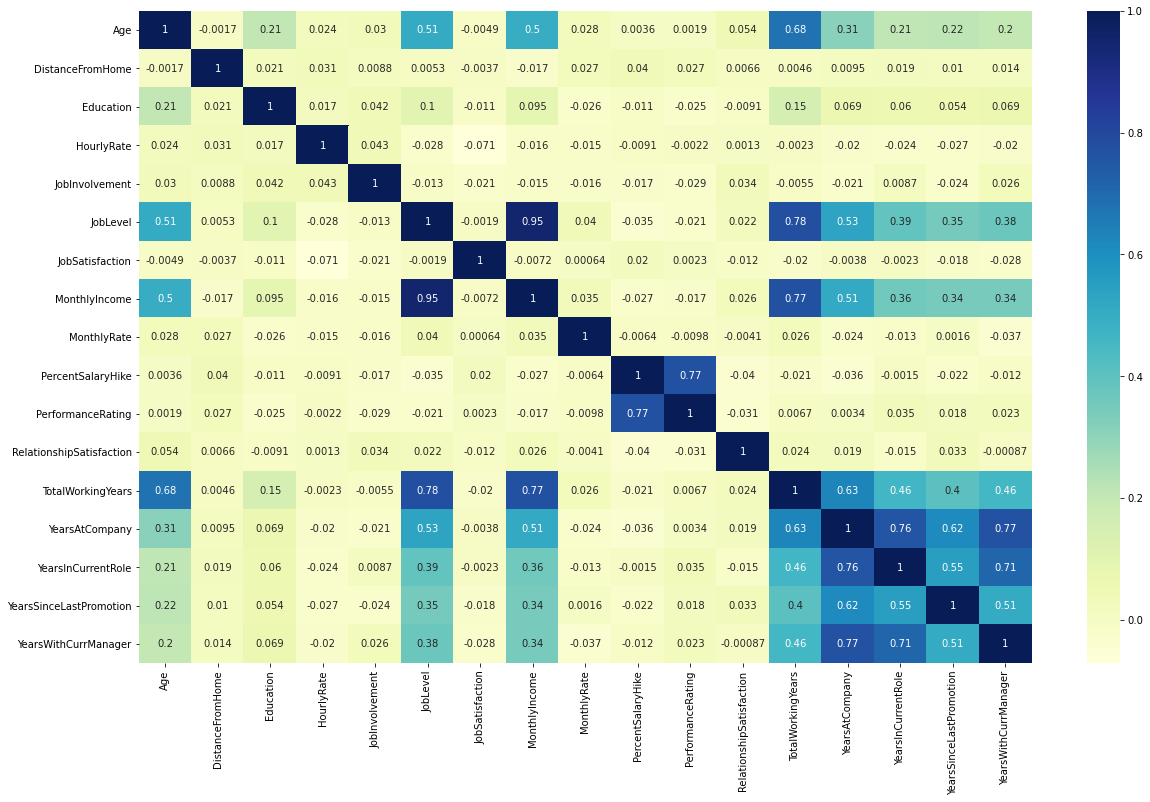

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')

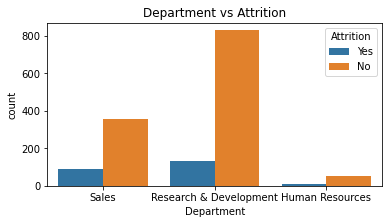

In [15]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Department',hue='Attrition',data=df)
plt.title("Department vs Attrition")
plt.show()

R&D dept have high attrition and HR dept have low attrition. here, we can also mark that No Attrition is also high in R&D dept so we can say that employee strength is higher in R&D

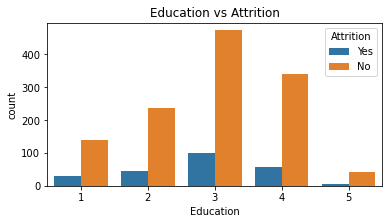

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Education',hue='Attrition',data=df)
plt.title("Education vs Attrition")
plt.show()

Education and attrition have not co-relation as per graph as we can visulise education 1 have lower attrition ratio then education 3 and edcation 3 have higher ratio then education 5

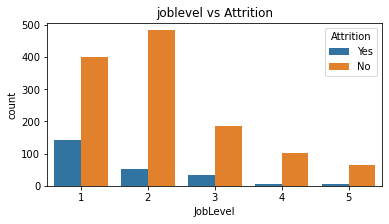

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'JobLevel',hue='Attrition',data=df)
plt.title("joblevel vs Attrition")
plt.show()

Job level 1 and 2 have higher attrition and it's going to decrease as level going upto 5

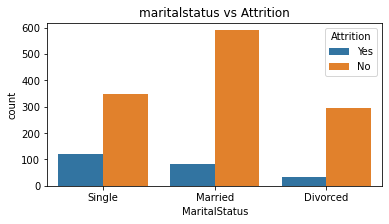

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'MaritalStatus',hue='Attrition',data=df)
plt.title("maritalstatus vs Attrition")
plt.show()

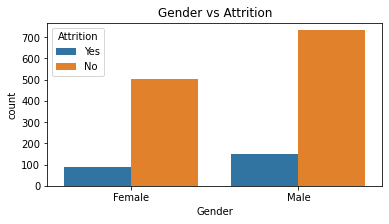

In [19]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Gender',hue='Attrition',data=df)
plt.title("Gender vs Attrition")
plt.show()

Attrition rate is quit higher in male employee as compare to Female

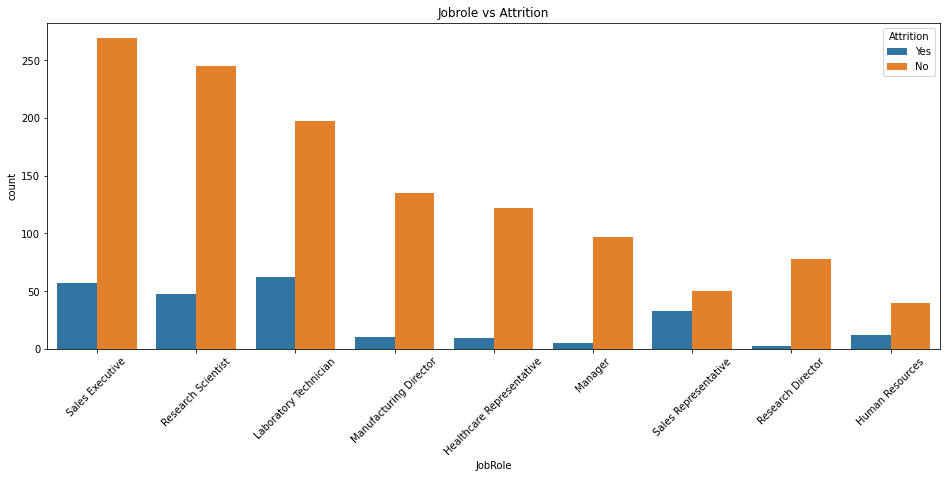

In [20]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'JobRole',hue='Attrition',data=df)
plt.title("Jobrole vs Attrition")
plt.xticks(rotation=45)
plt.show()

This is a perfect factor which we  can conclude for our model building as we can visulise that attrition rate is higher in Sales dept, Reseach Scientist, Laboratory Technician while it is very low in R&D and Managerial position/'

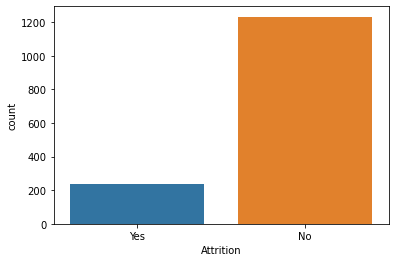

In [21]:
sns.countplot(df['Attrition'])

In [22]:
ext_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 25:
        print(f"{column} : {df[column].unique()}")
        ext_col.append(column)
        print("----------------------")
        
        
#For all integer column we are extracting unique value so we can proceed according to it.

Education : [2 1 4 3 5]
----------------------
JobInvolvement : [3 2 4 1]
----------------------
JobLevel : [2 1 3 4 5]
----------------------
JobSatisfaction : [4 2 3 1]
----------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
----------------------
PerformanceRating : [3 4]
----------------------
RelationshipSatisfaction : [1 4 2 3]
----------------------
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
----------------------
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
----------------------
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
----------------------


In [23]:
ext_col2 = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        ext_col2.append(column)
        print("----------------------")
        
#Here, we take minimun and maximum for integer column as same as previous but here we extract column where unique valeus are more then 30, beacuse more than 30 uniuque contain column's visulisation is going to quite difficult

Age : Minimum: 18, Maximum: 60
----------------------
HourlyRate : Minimum: 30, Maximum: 100
----------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
----------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
----------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
----------------------
YearsAtCompany : Minimum: 0, Maximum: 40
----------------------


Percentage of Attrition wrt to joblevel = 1: 26.335174953959484
Percentage of Attrition wrt to joblevel = 2: 9.737827715355806
Percentage of Attrition wrt to joblevel = 3: 14.678899082568808
Percentage of Attrition wrt to joblevel = 4: 4.716981132075472
Percentage of Attrition wrt to joblevel = 5: 7.246376811594203


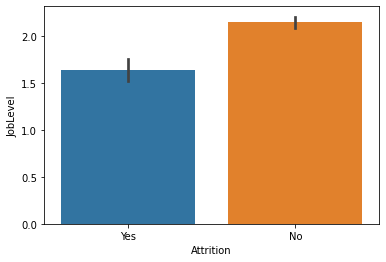

In [24]:
sns.barplot(x="Attrition", y="JobLevel", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Attrition wrt to joblevel = 1:", df["Attrition"][df["JobLevel"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Attrition wrt to joblevel = 2:", df["Attrition"][df["JobLevel"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Attrition wrt to joblevel = 3:", df["Attrition"][df["JobLevel"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of Attrition wrt to joblevel = 4:", df["Attrition"][df["JobLevel"] == 4].value_counts(normalize = True)[1]*100)

print("Percentage of Attrition wrt to joblevel = 5:", df["Attrition"][df["JobLevel"] == 5].value_counts(normalize = True)[1]*100)


On primary base we can say that As joblevel going from 1 to 5, attrition rate is goign to decrease
joblevel = 1: 26.335174953959484
joblevel = 2: 9.737827715355806
joblevel = 3: 14.678899082568808
joblevel = 5: 7.246376811594203

In [25]:

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

#By using LabelEncoder we can give particular interger value to object data

In [26]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,0,1,0,64,2,1,7,...,999,1,0,0,0,8,6,4,0,5
1,31,0,1,7,0,1,31,1,1,6,...,1328,0,12,1,3,10,10,7,1,7
2,19,1,1,1,1,1,62,1,0,2,...,18,1,4,0,1,7,0,0,0,0
3,15,0,1,2,3,0,26,2,0,6,...,1228,1,0,0,2,8,8,7,3,0
4,9,0,1,1,0,1,10,2,0,2,...,846,0,1,0,3,6,2,2,2,2


In [27]:
df.dtypes


Age                         int64
Attrition                   int32
Department                  int32
DistanceFromHome            int64
Education                   int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
TotalWorkingYears           int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

Here we can see that all columns are in int64 format which is ready for machine learning process 

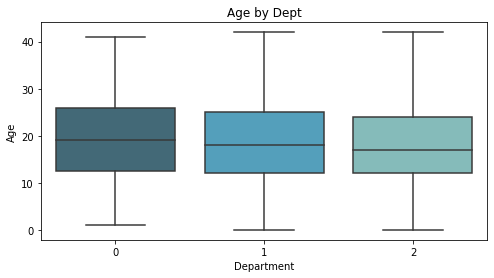

In [28]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Department', y = 'Age', data = df, palette= 'GnBu_d').set_title('Age by Dept')
plt.show()

All 3 dept have almost same average age value and there is no outliers visulise in this catagory

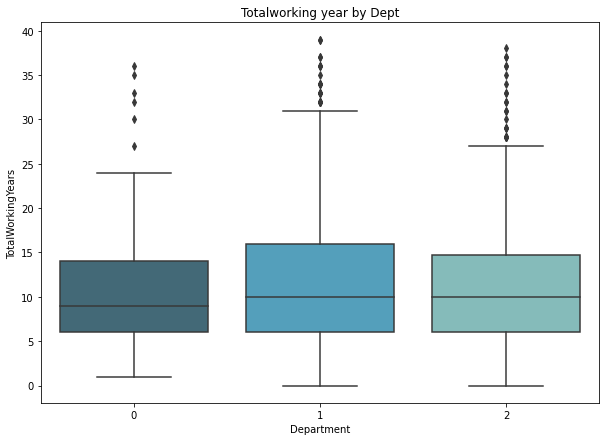

In [29]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Department', y = 'TotalWorkingYears', data = df, palette= 'GnBu_d').set_title('Totalworking year by Dept')
plt.show()


Here , we can mark that Total working hours quite higher in sales dept and it is low in R&D dept. So we can say hat work load is also factor which affects Attrition rate

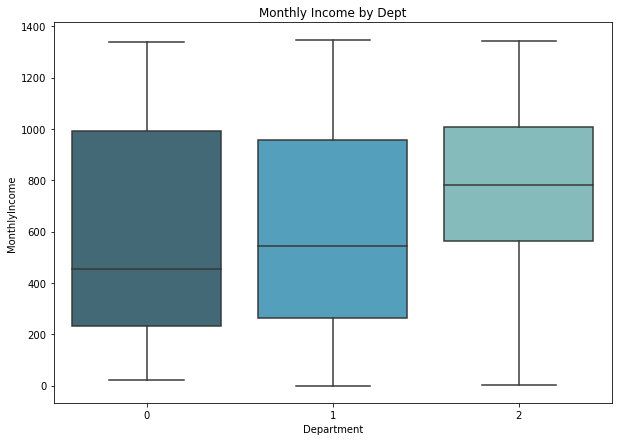

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Department', y = 'MonthlyIncome', data = df, palette= 'GnBu_d').set_title('Monthly Income by Dept')
plt.show()



As we can visulise that Avg monthly income is quite different in all 3 department and we should also mark that mean of the monthly income is also disturbed in first 2 dept

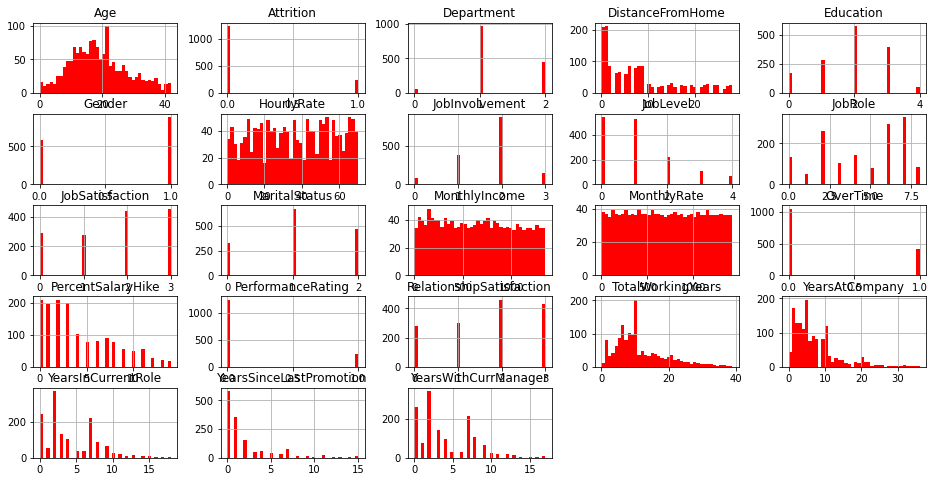

In [31]:
df.hist(figsize=(16,8),bins=40, color='red')
plt.show()

Hist chart is very useful to visulise data distribution.
Gender : Normal distribution
Job level : it have right skewness
Marital staatus : Normal Distribution
percent salary hike : Right side skewness
Total working hours: Right side skewness
Year as company : Right side skewness
Years in Current Role : Right side skewness
Year since last promotion : Right skewness
Years with current manager : Right side skewness

now we will see value of this skewness and remove it by using some advance techniques

In [32]:
df.skew()

Age                         0.413286
Attrition                   1.844366
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.112899
YearsAtCompany              1.676650
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

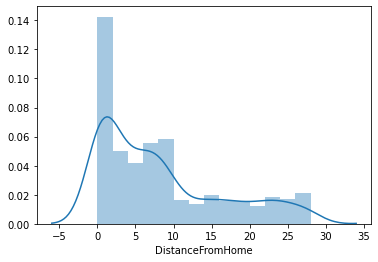

In [33]:
sns_plot = sns.distplot(df["DistanceFromHome"])
#right skewed


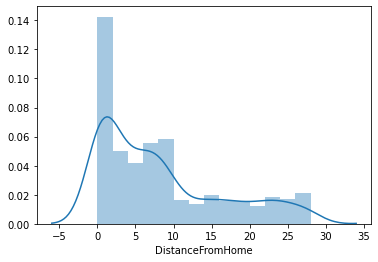

In [34]:
sns_plot = sns.distplot(df["DistanceFromHome"])
#right skewed

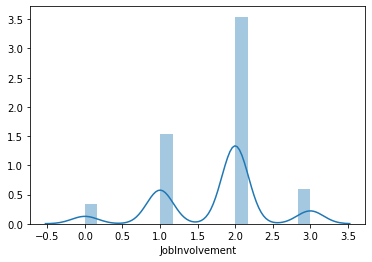

In [35]:
sns_plot = sns.distplot(df["JobInvolvement"])
#Left skewed

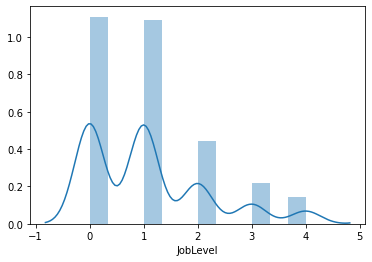

In [36]:
sns_plot = sns.distplot(df["JobLevel"])
#right skewed

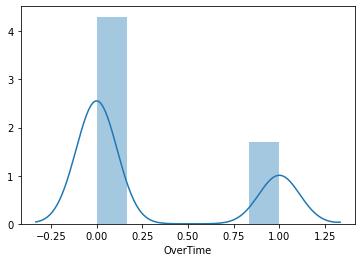

In [37]:
sns_plot = sns.distplot(df["OverTime"])
#right skewed

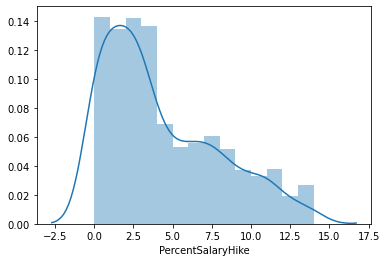

In [38]:
sns_plot = sns.distplot(df["PercentSalaryHike"])
#right skewed

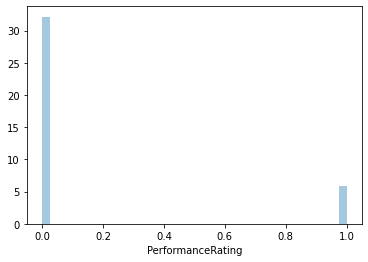

In [39]:
sns_plot = sns.distplot(df["PerformanceRating"])
#right skewed

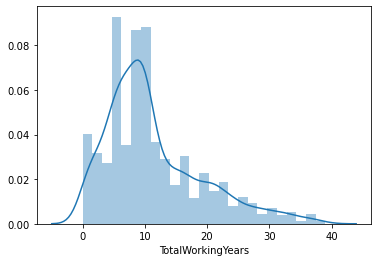

In [40]:
sns_plot = sns.distplot(df["TotalWorkingYears"])
#right skewed

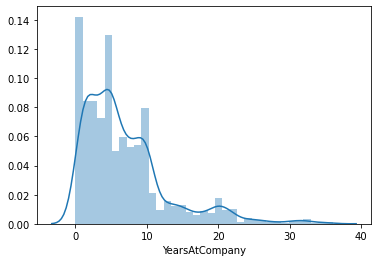

In [41]:
sns_plot = sns.distplot(df["YearsAtCompany"])
#right skewed

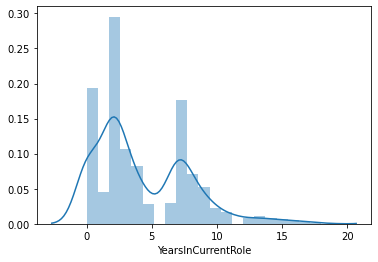

In [42]:
sns_plot = sns.distplot(df["YearsInCurrentRole"])
#right skewed

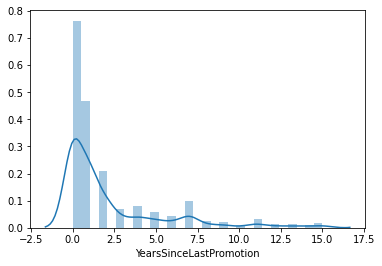

In [43]:
sns_plot = sns.distplot(df["YearsSinceLastPromotion"])
#right skewed

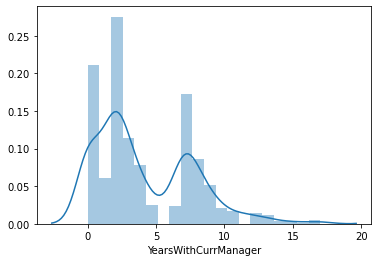

In [44]:
sns_plot = sns.distplot(df["YearsWithCurrManager"])
#right skewed

From all above graph, we can visulise that data are plotted high on left side and low on right side

In [45]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(1470, 23)
(1387, 23)


Z score is a advance technique to remove outliers because it can affect the accuracy of our model. 
As we can see that after using Z score we have 1387 rows instead of 1470 means we have 83 outliers in data
which are now removed

In [46]:
from scipy.stats import boxcox
for col in df:
    if df_1[col].skew()>=.50:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.50:
        df_1[col]=np.power(df_1[col],2)
        

As we know that we have right skewed data so here we use
Log, Square root transformation to remove skewness

In [47]:
df_1.skew()

Age                         0.472280
Attrition                   1.805983
Department                  0.183919
DistanceFromHome           -0.479786
Education                  -0.289024
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement              0.796633
JobLevel                   -0.240467
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
OverTime                    0.954751
PercentSalaryHike           0.251551
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
TotalWorkingYears           0.436606
YearsAtCompany              0.537810
YearsInCurrentRole          0.127281
YearsSinceLastPromotion     0.157801
YearsWithCurrManager        0.132623
dtype: float64

In [48]:
df_1.shape

(1387, 23)

In [49]:
df_1.head()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1.0,2,0.000000,1,0,64,4,1.0,7,...,999,1.0,0.000000,0.0,0,4.000000,3.301927,2.519842,0.000000,2.924018
1,31,0.0,1,1.912931,0,1,31,1,1.0,6,...,1328,0.0,5.241483,1.0,3,4.641589,4.641589,3.659306,1.000000,3.659306
2,19,1.0,1,1.000000,1,1,62,1,0.0,2,...,18,1.0,2.519842,0.0,1,3.659306,0.000000,0.000000,0.000000,0.000000
3,15,0.0,1,1.259921,3,0,26,4,0.0,6,...,1228,1.0,0.000000,0.0,2,4.000000,4.000000,3.659306,1.442250,0.000000
4,9,0.0,1,1.000000,0,1,10,4,0.0,2,...,846,0.0,1.000000,0.0,3,3.301927,1.587401,1.587401,1.259921,1.587401


In [50]:
df_1.describe()

,Age,Attrition,Department,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,18.258111,0.165105,1.260995,1.656375,1.896179,0.602019,35.847152,3.506849,0.690136,4.501802,...,708.806777,0.284787,2.342405,0.152848,1.703677,4.506663,3.116257,2.208282,0.787625,2.168543
std,8.838767,0.371409,0.526032,0.894735,1.023198,0.489658,20.280564,2.320416,0.569794,2.480624,...,407.657136,0.451476,1.560375,0.359971,1.081529,2.032310,1.679179,1.469886,0.721197,1.489336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,18.000000,1.000000,0.000000,2.000000,...,359.500000,0.000000,1.000000,0.000000,1.000000,3.301927,2.080084,1.587401,0.000000,1.587401
50%,17.000000,0.000000,1.000000,1.817121,2.000000,1.000000,36.000000,4.000000,1.000000,5.000000,...,703.000000,0.000000,2.080084,0.000000,2.000000,4.326749,2.924018,2.080084,1.000000,2.080084
75%,24.000000,0.000000,2.000000,2.351335,3.000000,1.000000,53.000000,4.000000,1.000000,7.000000,...,1061.500000,1.000000,3.659306,0.000000,3.000000,5.528775,4.326749,3.659306,1.259921,3.659306
max,42.000000,1.000000,2.000000,3.036589,4.000000,1.000000,70.000000,9.000000,1.587401,8.000000,...,1426.000000,1.000000,5.808786,1.000000,3.000000,10.495085,8.549880,6.082202,2.223980,5.808786


Summary:
    
We load dataset

Check for basic like shape, null values, columns etc

Visulise data plotting to get co-relation between each other column

Drop un-related column to decrease datasize for proper and accurate accuracy

EDA to get better understanding the data

Encoding Object data

Check skewness of data

Remove outliers

Remove Skewness

# MODEL BUILDING PART

First we drop our target column from data and set it in Y 

In [51]:

x =df_1.drop('Attrition',axis=1)
y =df_1['Attrition']

Using train test split method, we will split our data in 2 set, one is use for Training purpose and another is for testing purpose
in which based on trained data, we feed test data set and check that are we get accurate result or not?

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,Age,Department,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
74,18,1,1.709976,2,0,25,9,0.000000,2,3,...,1153,0.0,1.000000,0.0,1,2.924018,1.000000,0.000000,0.000000,0.000000
1154,29,0,2.924018,3,0,68,4,1.587401,3,2,...,180,0.0,0.000000,0.0,2,9.000000,2.924018,1.587401,1.000000,0.000000
119,25,2,2.924018,1,1,62,4,1.442250,3,3,...,1000,1.0,1.000000,0.0,3,8.549880,8.549880,5.241483,1.587401,5.241483
1087,16,2,1.817121,1,1,25,4,0.000000,8,2,...,159,1.0,5.808786,1.0,1,5.241483,4.946087,4.641589,1.709976,3.659306
1226,14,1,2.080084,2,1,26,4,0.000000,6,2,...,884,0.0,1.587401,0.0,0,4.641589,2.924018,1.587401,1.000000,2.080084


Here, we will use standscaler method to reform all data on same scale because if we take above data, 
we can see that gender have value of 0 and 1 while job role have value of 0 to 8 so model give high priority to
Job role, in actual it is a encoding and we should not give high priority on this base 


In [53]:
STD=StandardScaler()
x=STD.fit_transform(x)

In [54]:
lg=LogisticRegression()

#Import logistic regression because our target variables are in form of yes or no so we will use logistic regression

In [55]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 43 score
test score 86.45533141210375
train score 86.53846153846155
Random state 121 score
test score 86.45533141210375
train score 86.53846153846155
Random state 201 score
test score 86.74351585014409
train score 86.73076923076923
Random state 258 score
test score 86.45533141210375
train score 86.53846153846155
Random state 299 score
test score 86.74351585014409
train score 86.73076923076923
Random state 434 score
test score 86.45533141210375
train score 86.53846153846155
Random state 479 score
test score 86.45533141210375
train score 86.53846153846155
Random state 490 score
test score 86.74351585014409
train score 86.73076923076923


From above code, our model will do regression and fit data 500 times with 75% trained data and 25% test dataset.

We get better accuracy at Random state of 490

# MODELS

BELOW ARE THE MODELS WHICH WE ARE GOING TO USE IN MODEL BUILDING

1)Support Vector Classifier

2)Random Forest Classifier

3)Decision Tree Classifier

4)Gaussion NB Classifier

5)KNN

6) SGDC Classifier

In [56]:
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()


In [57]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

LOGISTIC REGRESSION

In [58]:
fun(lg)

Accuracy Score 85.5907780979827
Confusion Matrix
 [[279  10]
 [ 40  18]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       289
         1.0       0.64      0.31      0.42        58

    accuracy                           0.86       347
   macro avg       0.76      0.64      0.67       347
weighted avg       0.84      0.86      0.83       347

F1 score 41.86046511627907


SUPPORT VECTOR CLASSIFIER

In [59]:
fun(svc)

Accuracy Score 85.30259365994236
Confusion Matrix
 [[288   1]
 [ 50   8]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       289
         1.0       0.89      0.14      0.24        58

    accuracy                           0.85       347
   macro avg       0.87      0.57      0.58       347
weighted avg       0.86      0.85      0.81       347

F1 score 23.88059701492537


DECISION TREE CLASSIFIER

In [60]:
fun(dtc)

Accuracy Score 70.89337175792507
Confusion Matrix
 [[229  60]
 [ 41  17]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       289
         1.0       0.22      0.29      0.25        58

    accuracy                           0.71       347
   macro avg       0.53      0.54      0.54       347
weighted avg       0.74      0.71      0.72       347

F1 score 25.185185185185183


In [61]:
fun(gb)

Accuracy Score 80.40345821325649
Confusion Matrix
 [[249  40]
 [ 28  30]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       289
         1.0       0.43      0.52      0.47        58

    accuracy                           0.80       347
   macro avg       0.66      0.69      0.67       347
weighted avg       0.82      0.80      0.81       347

F1 score 46.87500000000001


KNN CLASSIFIER

In [62]:
fun(knn)

Accuracy Score 84.72622478386167
Confusion Matrix
 [[284   5]
 [ 48  10]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       289
         1.0       0.67      0.17      0.27        58

    accuracy                           0.85       347
   macro avg       0.76      0.58      0.59       347
weighted avg       0.82      0.85      0.81       347

F1 score 27.397260273972602


SGDC CLASSIFIER

In [63]:
fun(sgdc)

Accuracy Score 84.14985590778097
Confusion Matrix
 [[278  11]
 [ 44  14]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       289
         1.0       0.56      0.24      0.34        58

    accuracy                           0.84       347
   macro avg       0.71      0.60      0.62       347
weighted avg       0.81      0.84      0.81       347

F1 score 33.734939759036145


RANDOM FOREST CLASSIFIER

In [64]:
fun(rndf)
pred=rndf.predict(x_test)

Accuracy Score 85.5907780979827
Confusion Matrix
 [[288   1]
 [ 49   9]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       289
         1.0       0.90      0.16      0.26        58

    accuracy                           0.86       347
   macro avg       0.88      0.58      0.59       347
weighted avg       0.86      0.86      0.81       347

F1 score 26.470588235294112


Ensembel Method

In [65]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


In [66]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 85.87896253602305
Confusion Matrix
 [[279  10]
 [ 39  19]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       289
         1.0       0.66      0.33      0.44        58

    accuracy                           0.86       347
   macro avg       0.77      0.65      0.68       347
weighted avg       0.84      0.86      0.84       347

F1 score 43.678160919540225


In [67]:
fun(gd)
pred=gd.predict(x_test)

Accuracy Score 82.9971181556196
Confusion Matrix
 [[274  15]
 [ 44  14]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       289
         1.0       0.48      0.24      0.32        58

    accuracy                           0.83       347
   macro avg       0.67      0.59      0.61       347
weighted avg       0.80      0.83      0.81       347

F1 score 32.18390804597702


CROSS VALIDATION

In [68]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)


score of cross validation score for svc 85.29257460457626
score of cross validation score for Decisiontreeclassifier 78.01080435290757
score of cross validation score for knn 84.64431343012234
score of cross validation score for GausianNB classifier 79.45199075396722
score of cross validation score for Randomforest classifier 85.50832070097117
score of cross validation score for Adaboost classifier 85.15038063667104
score of cross validation score for Gradientboost classifier 85.72570838400159


HYPER TUNING

In [69]:
p1={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2,3,4]}

In [70]:
gd=GridSearchCV(knn,p1)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [71]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=1,weights='distance')
fun(knn1)

Accuracy Score 84.14985590778097
Confusion Matrix
 [[280   9]
 [ 46  12]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       289
         1.0       0.57      0.21      0.30        58

    accuracy                           0.84       347
   macro avg       0.72      0.59      0.61       347
weighted avg       0.81      0.84      0.81       347

F1 score 30.37974683544304


In [72]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
gd1=GridSearchCV(rndf,p2)
gd1.fit(x,y)
print(gd1.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}


In [73]:
rndf1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=10)
fun(rndf1)

Accuracy Score 85.30259365994236
Confusion Matrix
 [[286   3]
 [ 48  10]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       289
         1.0       0.77      0.17      0.28        58

    accuracy                           0.85       347
   macro avg       0.81      0.58      0.60       347
weighted avg       0.84      0.85      0.81       347

F1 score 28.169014084507044


In [74]:
p3={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,p3)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


In [75]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='log2',splitter='best')
fun(dtc1)

Accuracy Score 82.13256484149855
Confusion Matrix
 [[275  14]
 [ 48  10]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       289
         1.0       0.42      0.17      0.24        58

    accuracy                           0.82       347
   macro avg       0.63      0.56      0.57       347
weighted avg       0.78      0.82      0.79       347

F1 score 24.39024390243903


Voting Classifier

In [76]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('knn',KNeighborsClassifier()))

In [77]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Area Under Curve

In [78]:
y_pred_prob=rndf1.predict_proba(x_test)[:,1]
y_pred_prob

array([0.11394347, 0.13574113, 0.16916437, 0.03149575, 0.17402566,
       0.11036456, 0.3646951 , 0.06007263, 0.12717694, 0.23078038,
       0.09720904, 0.04551216, 0.10286684, 0.1834123 , 0.09012569,
       0.03641681, 0.2429358 , 0.15020467, 0.41302353, 0.05403642,
       0.3205698 , 0.2023465 , 0.30544788, 0.18247673, 0.29904404,
       0.1140083 , 0.22867838, 0.10209619, 0.15293452, 0.1825717 ,
       0.128842  , 0.16268119, 0.08390017, 0.1514181 , 0.30669813,
       0.17276374, 0.11594559, 0.10073496, 0.05088826, 0.19601409,
       0.09897271, 0.13897952, 0.49582393, 0.07669367, 0.60048885,
       0.28534869, 0.1158939 , 0.04323499, 0.14474104, 0.03168842,
       0.17512317, 0.14898833, 0.05598643, 0.14100792, 0.23390161,
       0.06354286, 0.14987731, 0.42469603, 0.07042394, 0.2992244 ,
       0.50839925, 0.16106328, 0.13205607, 0.13224468, 0.15949497,
       0.09345814, 0.04977094, 0.26799144, 0.15777397, 0.08862221,
       0.26166883, 0.04669593, 0.06250689, 0.11146852, 0.14554

In [79]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.5947380980789883


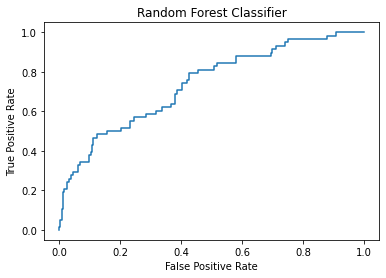

In [80]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [81]:
import pickle
filename='HR_Attrition.pkl'
pickle.dump(rndf1,open(filename,'wb'))

# CONCLUSION:

Here, I select Random Forest model after comparing Recall, Accuracy,F1 score and check for best accuracy with low variation

# ------------------------------THANK YOU-------------------------------